### Variables categoricas ordinales

1. Importe los datos del archivo `data.csv`

Se importan las librerias necesarias y se crea el dataframe

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv('https://raw.githubusercontent.com/isaacGGomez/Ing_Caract/master/data.csv')
df.head()

,Escolaridad,No. de hijos
0,Primaria trunca,9
1,Secundaria,3
2,Preparatoria,2
3,Sin escolaridad,3
4,Primaria,2


Se puede observar la distribución de los hijos segun la escolaridad donde a mayor escolaridad mayor la cantidad de hijos

<AxesSubplot:ylabel='Escolaridad'>

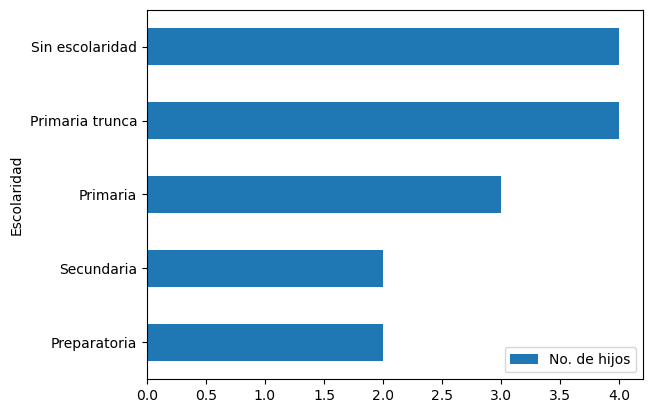

In [23]:
x = df.groupby(['Escolaridad']).median().sort_values(by = ['No. de hijos'], ascending = True)
x.plot(kind = 'barh')

2. Sustituya ahora la variable categórica por valores resultantes de un polinomio cuadrático estrictamente decreciente.

Se ordenan las variables según el comportamiento

In [24]:
dfcatEsc = ['Preparatoria','Secundaria','Primaria','Primaria trunca', 'Sin escolaridad']
dfcatEsc

['Preparatoria',
 'Secundaria',
 'Primaria',
 'Primaria trunca',
 'Sin escolaridad']

Se hace la codificación mediante PolinomialFeatures de Sklearn

In [25]:
qf = PolynomialFeatures(degree=2).fit_transform(pd.factorize(dfcatEsc)[0].reshape(-1,1))[:,2]
qf = dict(zip(dfcatEsc,qf))
qf

{'Preparatoria': 0.0,
 'Secundaria': 1.0,
 'Primaria': 4.0,
 'Primaria trunca': 9.0,
 'Sin escolaridad': 16.0}

In [26]:
df['Esc Cuad'] = df['Escolaridad'].map(qf)
df

,Escolaridad,No. de hijos,Esc Cuad
0,Primaria trunca,9,9.0
1,Secundaria,3,1.0
2,Preparatoria,2,0.0
3,Sin escolaridad,3,16.0
4,Primaria,2,4.0
...,...,...,...
5055,Secundaria,1,1.0
5056,Preparatoria,3,0.0
5057,Primaria,1,4.0
5058,Secundaria,3,1.0


3. Obtenga una relación lineal usando la clase *LinearRegression* del paquete *sklearn.linear_model*, para la codificacón obtenida y la variable `No. de hijos` y grafique.

In [27]:
linearreg = LinearRegression()
linearreg.fit(df[['Esc Cuad']],df['No. de hijos'])


LinearRegression()

Proyección de la regresión sobre los reales

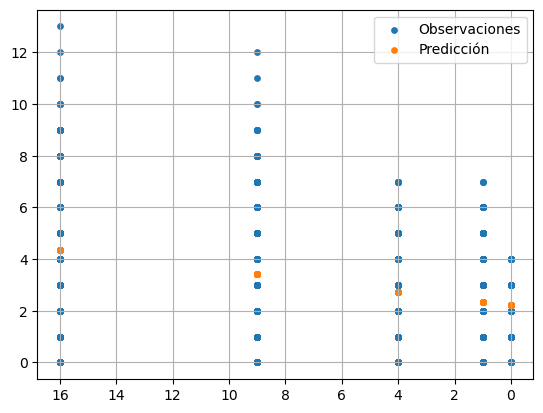

In [32]:
func=linearreg.predict(df[['Esc Cuad']])
plt.scatter(df['Esc Cuad'],df['No. de hijos'],s=15,label='Observaciones',)
plt.scatter(df['Esc Cuad'],func,s=15,label='Predicción')
plt.gca().invert_xaxis()
plt.legend()
plt.grid()